# White Light Interferogram Simulator


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import csv


###  Load heightmap from CSV

In [3]:

def load_heightmap(filename="heightmap.csv"):
    data = []
    with open(filename, "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            data.append([float(row["z"]), int(row["x"]), int(row["y"])])

    max_x = max(d[1] for d in data) + 1
    max_y = max(d[2] for d in data) + 1
    Z = np.zeros((max_y, max_x))
    for z, x, y in data:
        Z[y, x] = z
    return Z

try:
    heightmap = load_heightmap("heightmap.csv")
    print("Loaded heightmap.csv")
except FileNotFoundError:
    # fallback surface
    size = 64
    x = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, x)
    heightmap = 0.5 * np.exp(-(X**2 + Y**2) / 0.2)
    print("Using synthetic Gaussian surface")


Using synthetic Gaussian surface


### WLI Simulation Parameters

In [4]:

lambda0 = 600.0   # central wavelength (nm)
Lc = 100.0        # coherence length (nm)
s_range = np.linspace(-300, 300, 200)  # reference mirror scan (nm)

### Simulating a White light Interferogram

In [5]:

def simulate_interferogram(z_surface, lambda0=600.0, Lc=100.0, s_range=None):# default values are given.
    """
    Simulate white light interferogram for a given surface.

    z_surface : 2D numpy array (heightmap, arbitrary units)
    lambda0   : central wavelength (nm)
    Lc        : coherence length (nm)
    s_range   : 1D array of reference mirror positions (nm)
    """
    if s_range is None:
        s_range = np.linspace(-300, 300, 200) #default values for s_range

   

#### Convert height to nm scale


In [6]:
z_surface_nm = 100 * z_surface   # scale to nm (adjust as needed)

NameError: name 'z_surface' is not defined

#### Expand for broadcasting


In [ ]:
    z_exp = z_surface_nm[:, :, np.newaxis]         # (x, y, 1)
    s_exp = s_range[np.newaxis, np.newaxis, :]     # (1, 1, s)

    

NameError: name 'z_surface_nm' is not defined

#### Optical path difference </br>
   $$
   OPD = 2 \cdot (z_{exp} - s_{exp})
   $$


In [ ]:
    OPD = 2 * (z_exp - s_exp)    

NameError: name 'z_exp' is not defined

#### Degree of coherence (Gaussian envelope)
$$
\gamma = \exp\!\left(-\frac{OPD^2}{2 \, L_c^2}\right)
$$

In [ ]:
    gamma = np.exp(-(OPD**2) / (2 * Lc**2))

NameError: name 'OPD' is not defined

#### Interferogram intensity
$$
I = 1 + \gamma \cdot \cos\!\left(\frac{2 \pi}{\lambda_0} \, OPD\right)
$$


In [ ]:
    I = 1 + gamma * np.cos((2 * np.pi / lambda0) * OPD)
    return I, s_range

NameError: name 'gamma' is not defined

#### Run Simulation


In [ ]:
I, s_range = simulate_interferogram(heightmap, lambda0, Lc, s_range)

TypeError: cannot unpack non-iterable NoneType object

#### Surface heightmap

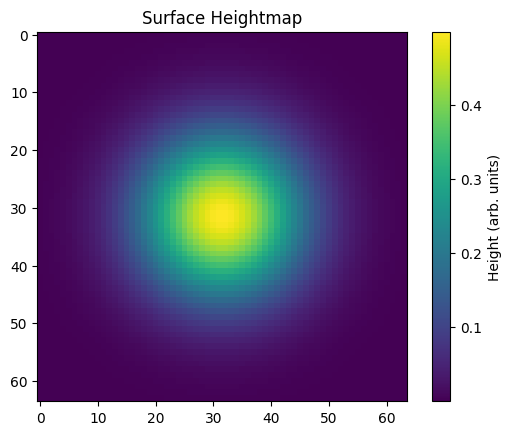

In [ ]:
plt.imshow(heightmap, cmap="viridis")
plt.colorbar(label="Height (arb. units)")
plt.title("Surface Heightmap")
plt.show()

#### One interferogram slice (fixed mirror position)


In [ ]:
idx = len(s_range) // 2
plt.imshow(I[:, :, idx], cmap="gray")
plt.title(f"Interferogram at s = {s_range[idx]:.1f} nm")
plt.colorbar(label="Intensity")
plt.show()

NameError: name 'I' is not defined

#### Example waveform at a single pixel

In [ ]:
px, py = heightmap.shape[0]//2, heightmap.shape[1]//2
plt.plot(s_range, I[px, py, :])
plt.xlabel("Reference Mirror Position s (nm)")
plt.ylabel("Intensity")
plt.title(f"Waveform at pixel ({px},{py})")
plt.show()

NameError: name 'I' is not defined